## LR vs SGD Model Comparision

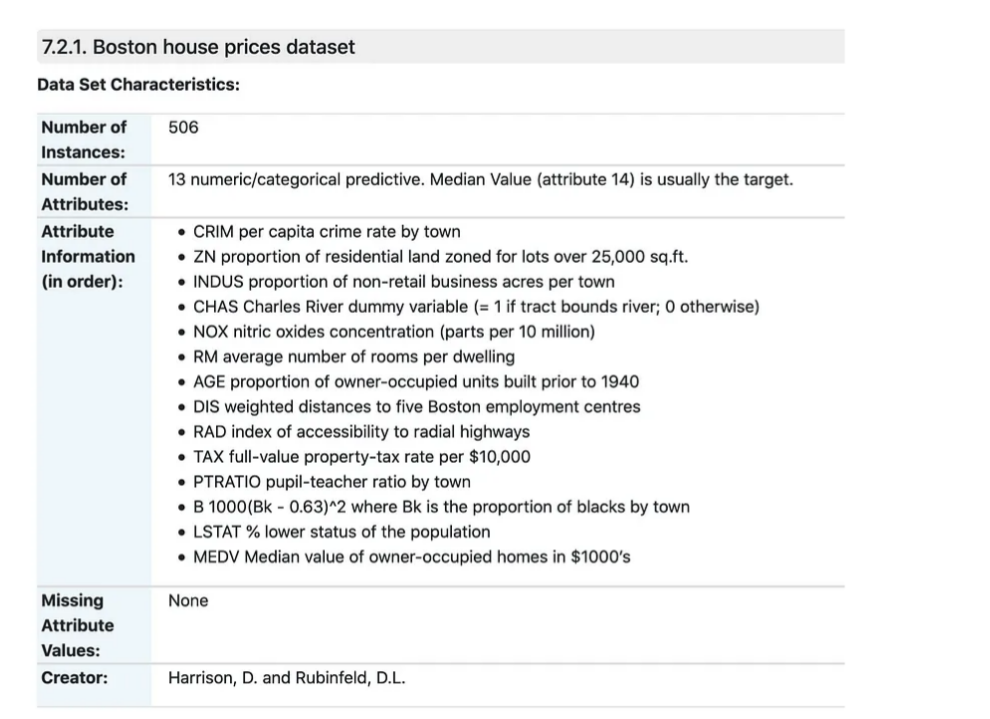

#### <b> Importing Required Libraries </b>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

from tabulate import tabulate

#from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

#### <b> Load the Data</b>

In [2]:
#Load the data dictionary
boston = pd.read_csv("BostonHousing.csv")

#Find the dict keys
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.shape

(506, 14)

#### <b> Dataset Description</b>

In [4]:
Y = boston["medv"]

In [5]:
boston.pop("medv")

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [6]:
X=boston

In [7]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [8]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

#### <b> Find Features and Target</b>

Let us split the data into **test** and **train.**

In [9]:
#X = boston.data
#Y = boston.target

#Splitting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [10]:
x_train.shape

(354, 13)

In [11]:
x_test.shape

(152, 13)

#### <b> Standardizing Data</b>

Let us standardize the **test** and **train** data using the **StandardScaler()** function.

In [12]:
scaler = StandardScaler()#.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_train

array([[-0.40018016,  2.86245642, -1.39745782, ..., -2.56892344,
        -0.01652383, -0.6096956 ],
       [-0.38616203, -0.48221354, -0.23256862, ...,  0.37022387,
         0.44913501, -0.12690342],
       [ 0.63404757, -0.48221354,  0.96654009, ...,  0.81554922,
         0.44913501,  1.41661157],
       ...,
       [ 0.23896334, -0.48221354,  0.96654009, ...,  0.81554922,
         0.41545976, -0.37113947],
       [-0.40016024, -0.48221354, -1.12797917, ..., -0.25323162,
         0.39752877, -0.58129606],
       [-0.39505217, -0.48221354,  2.04302888, ...,  0.32569134,
         0.2434754 ,  0.71372296]], shape=(354, 13))

In [14]:

# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [15]:
x_test

array([[ 0.37502383, -0.48221354,  0.96654009, ...,  0.81554922,
        -3.86282871,  1.47483063],
       [-0.33190475,  0.35395395, -1.04813364, ..., -2.3907933 ,
         0.30032973, -0.72613372],
       [-0.33473273, -0.48221354, -0.45356963, ...,  1.1718095 ,
         0.26457711, -0.3753994 ],
       ...,
       [-0.18284886, -0.48221354,  1.17756041, ..., -1.6337402 ,
         0.14736971, -1.30690431],
       [ 0.92819798, -0.48221354,  0.96654009, ...,  0.81554922,
        -0.70271188,  0.16987177],
       [-0.40196992,  1.81724706, -1.07522409, ..., -0.34229669,
         0.35149863, -1.1776864 ]], shape=(152, 13))

In [16]:
x_train

array([[-0.40018016,  2.86245642, -1.39745782, ..., -2.56892344,
        -0.01652383, -0.6096956 ],
       [-0.38616203, -0.48221354, -0.23256862, ...,  0.37022387,
         0.44913501, -0.12690342],
       [ 0.63404757, -0.48221354,  0.96654009, ...,  0.81554922,
         0.44913501,  1.41661157],
       ...,
       [ 0.23896334, -0.48221354,  0.96654009, ...,  0.81554922,
         0.41545976, -0.37113947],
       [-0.40016024, -0.48221354, -1.12797917, ..., -0.25323162,
         0.39752877, -0.58129606],
       [-0.39505217, -0.48221354,  2.04302888, ...,  0.32569134,
         0.2434754 ,  0.71372296]], shape=(354, 13))

In [17]:
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.400180,2.862456,-1.397458,-0.263603,-1.327144,1.133462,-1.195894,1.694626,-0.859514,-0.488099,-2.568923,-0.016524,-0.609696,NaN
1,-0.386162,-0.482214,-0.232569,-0.263603,0.227187,-0.781804,-0.565413,-0.647085,-0.396220,-0.115674,0.370224,0.449135,-0.126903,21.6
2,0.634048,-0.482214,0.966540,-0.263603,1.558244,-0.891248,0.880346,-0.915366,1.688599,1.536210,0.815549,0.449135,1.416612,34.7


In [18]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [19]:
x_test

array([[ 0.37502383, -0.48221354,  0.96654009, ...,  0.81554922,
        -3.86282871,  1.47483063],
       [-0.33190475,  0.35395395, -1.04813364, ..., -2.3907933 ,
         0.30032973, -0.72613372],
       [-0.33473273, -0.48221354, -0.45356963, ...,  1.1718095 ,
         0.26457711, -0.3753994 ],
       ...,
       [-0.18284886, -0.48221354,  1.17756041, ..., -1.6337402 ,
         0.14736971, -1.30690431],
       [ 0.92819798, -0.48221354,  0.96654009, ...,  0.81554922,
        -0.70271188,  0.16987177],
       [-0.40196992,  1.81724706, -1.07522409, ..., -0.34229669,
         0.35149863, -1.1776864 ]], shape=(152, 13))

In [20]:
#Shape of test and train data metrics
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


#### <b> Linear Regression: Boston Housing Prediction</b>

Let us calculate **R-Squared**, **Linear Regressor Model Accuracy**, **MAE**, **MSE**, and **RMSE**.

In [22]:
print("Linear Regression: Boston Housing Prediction")
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_score_train = lin_reg.score(x_train, y_train)
print("R-squared for train:", lin_score_train)

lin_y_pred = lin_reg.predict(x_test)
lin_accuracy = explained_variance_score(y_test, lin_y_pred)
lin_accuracy = round(lin_accuracy*100, 6)
print("Linear Regressor Model Accuracy:", lin_accuracy, "%")


lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_mse = mean_squared_error(y_test, lin_y_pred)
lin_rmse = lin_mse**(1/2.0)

print("MAE:", lin_mae)
print("MSE:", lin_mae)
print("RMSE:", lin_rmse)
print()

Linear Regression: Boston Housing Prediction
R-squared for train: 0.7786221272703828
Linear Regressor Model Accuracy: 63.255321 %
MAE: 3.6481634115301795
MSE: 3.6481634115301795
RMSE: 5.72327695332765



Let us plot a graph of the **Actual vs. Predicted Target**.

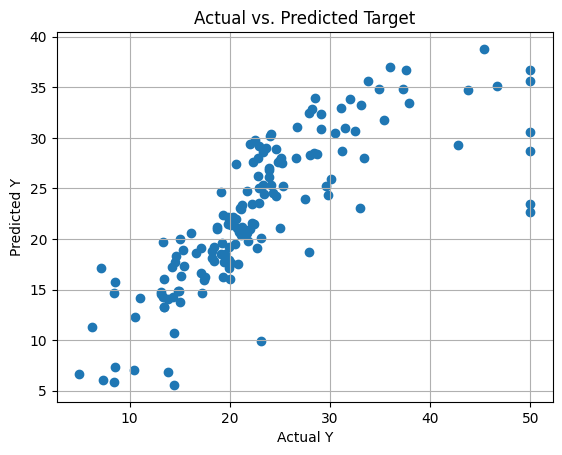

In [23]:
plt.scatter(y_test, lin_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

Let us plot a graph of the **Test vs. Predicted Data**.

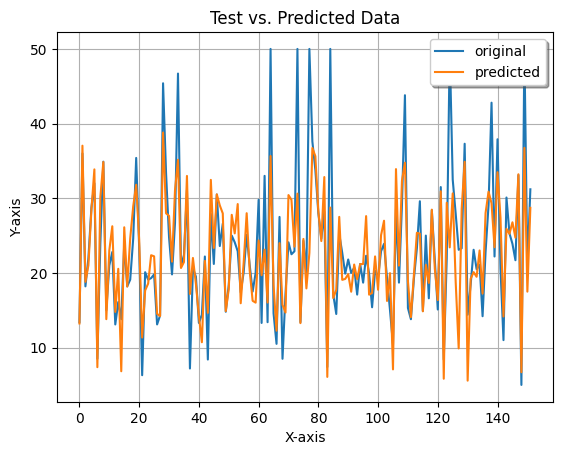

In [24]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lin_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### <b> SGD Regression: Boston Housing Prediction</b>

Let us calculate **R-squared**, **SGD Regressor Model Accuracy**, **MAE**, **MSE**, and **RMSE**.

In [25]:
print("SGD Regression: Boston Housing Prediction")
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)
sgd_score = sgd_reg.score(x_train, y_train)
print("R-squared:", sgd_score)

sgd_y_pred = sgd_reg.predict(x_test)
sgd_accuracy = explained_variance_score(y_test, sgd_y_pred)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy:", sgd_accuracy, "%")
print()

sgd_mae = mean_absolute_error(y_test, sgd_y_pred)
sgd_mse = mean_squared_error(y_test, sgd_y_pred)
sgd_rmse = sgd_mse**(1/2.0)

print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()

SGD Regression: Boston Housing Prediction
R-squared: 0.7778430888028536
SGD Regressor Model Accuracy: 63.19302 %

MAE: 3.641928527091483
MSE: 32.84475271018762
RMSE: 5.731034174578583



Let us plot a graph of the **Actual vs. Predicted Target**.

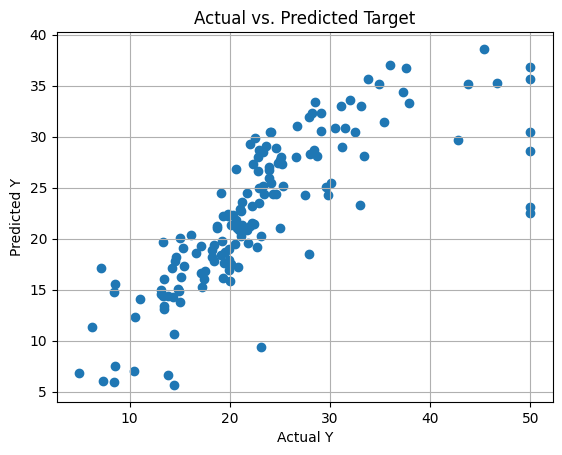

In [26]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

Let us plot a graph of the **Test vs. Predicted Data**.

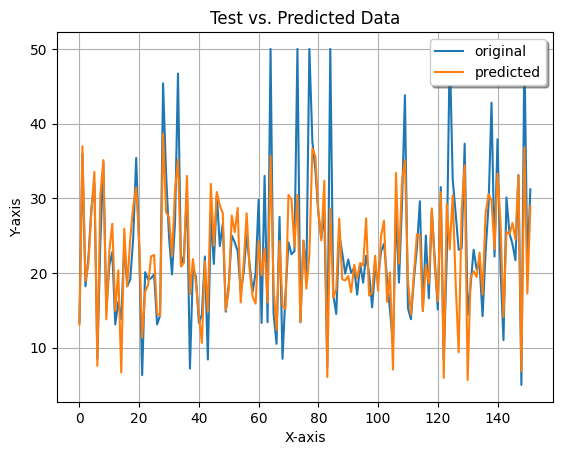

In [27]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, sgd_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### <b> Model Comparison</b>

**1. Evaluation Matrix Comparison**

In [28]:
#Performing evaluation matrix comparison
model_table = pd.DataFrame(columns = ["Comparison Matrix", "LR Model", "SGD Model"])
model_table["Comparison Matrix"] = ["Accuracy (Variance Score)", "R2 Score", "MAE", "MSE", "RMSE"]
model_table["LR Model"] = [lin_accuracy, lin_score, lin_mae, lin_mse, lin_rmse]
model_table["SGD Model"] = [sgd_accuracy, sgd_score, sgd_mae, sgd_mse, sgd_rmse]

print(tabulate(model_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+---------------------------+------------+-------------+
|    | Comparison Matrix         | LR Model   | SGD Model   |
|----+---------------------------+------------+-------------|
| 0  | Accuracy (Variance Score) | 63.2553    | 63.193      |
| 1  | R2 Score                  | 0.778622   | 0.777843    |
| 2  | MAE                       | 3.64816    | 3.64193     |
| 3  | MSE                       | 32.7559    | 32.8448     |
| 4  | RMSE                      | 5.72328    | 5.73103     |
+----+---------------------------+------------+-------------+


**2. Prediction Comparison - A: Scatter Plot**

Let us perform a comparison of the **Actual vs. Predicted Target** for the **Scatter Plot**.

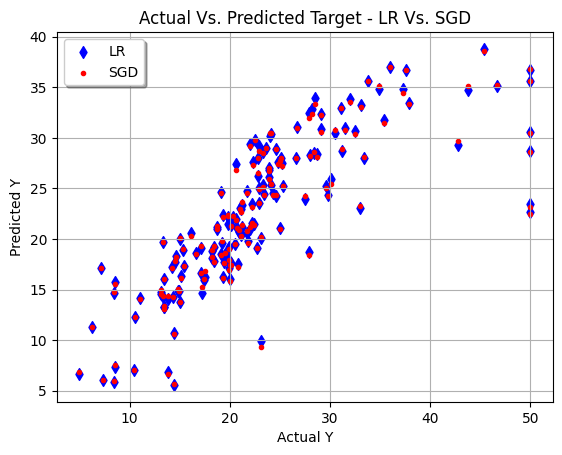

In [29]:
plt.scatter(y_test, lin_y_pred, c="b", marker="d", label='LR')
plt.scatter(y_test, sgd_y_pred, c="r", marker=".", label='SGD')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual Vs. Predicted Target - LR Vs. SGD')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid()
plt.show()

**3. Prediction Comparison - B: Line Graph**

Let us perform a comparison of **LR vs. SGD Prediction** for the **Line Graph**.

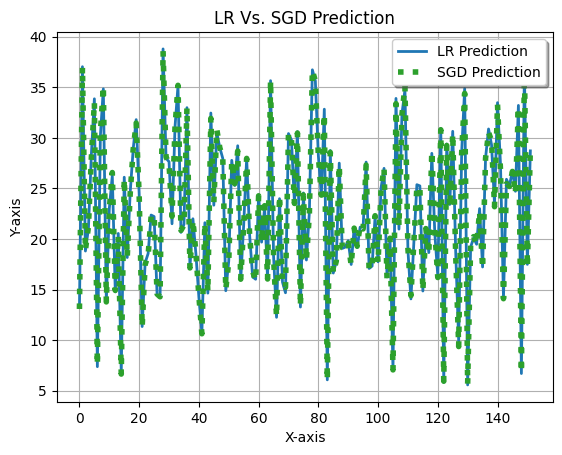

In [30]:
x_ax = range(len(sgd_y_pred))
plt.plot(x_ax, lin_y_pred, c="C0", linestyle="-", linewidth = 2, label="LR Prediction")
plt.plot(x_ax, sgd_y_pred, c="C2", linestyle=":", linewidth = 4, label="SGD Prediction")
plt.title("LR Vs. SGD Prediction")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**4. Prediction Comparison - C: Target Prediction Table**

Let us compare the **LR Predicted value** and **SGD Predicted value**.


In [31]:
prediction_table = pd.DataFrame(columns=["LR Predicted Value", "SGD Predicted Value"])
prediction_table["LR Predicted Value"] = lin_y_pred
prediction_table["SGD Predicted Value"] = sgd_y_pred
prediction_table["True"] = y_test
print(tabulate(prediction_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+-----+----------------------+-----------------------+--------+
|     | LR Predicted Value   | SGD Predicted Value   | True   |
|-----+----------------------+-----------------------+--------|
| 0   | 13.2332              | 13.0826               | 13.4   |
| 1   | 37.0405              | 36.9846               | 36     |
| 2   | 18.8122              | 18.8931               | 18.2   |
| 3   | 21.0093              | 21.2166               | 22     |
| 4   | 28.4145              | 28.1196               | 28.7   |
| 5   | 33.8661              | 33.5355               | 32     |
| 6   | 7.37695              | 7.54666               | 8.5    |
| 7   | 30.166               | 30.4857               | 24     |
| 8   | 34.8508              | 35.1108               | 34.9   |
| 9   | 13.806               | 13.7813               | 15     |
| 10  | 23.0198              | 22.9416               | 21     |
| 11  | 26.2503              | 26.5757               | 22.8   |
| 12  | 14.7741              | 14.9172  

In [32]:
y_test

array([13.4, 36. , 18.2, 22. , 28.7, 32. ,  8.5, 24. , 34.9, 15. , 21. ,
       22.8, 13.1, 16.1, 13.8, 23.9, 18.2, 19.1, 24.6, 35.4, 23.4,  6.3,
       20.1, 19.1, 19.3, 19.8, 13.1, 14.3, 45.4, 33.4, 24.8, 19.8, 26.7,
       46.7, 20.9, 22.4, 31.1,  7.2, 20.6, 19.5, 13.3, 14.4, 22.2,  8.4,
       27.9, 21.2, 30.5, 23.6, 26.6, 14.8, 18.4, 25. , 24.1, 22.9, 17.4,
       20.1, 25.1, 21.1, 17.5, 20. , 29.8, 13.3, 33. , 13.4, 50. , 14.6,
       10.5, 27.5,  8.5, 17.2, 24.1, 22.5, 22.9, 50. , 13.4, 24.3, 19.9,
       50. , 37.6, 33.8, 28. , 24.6, 28.2,  7.4, 50. , 17.1, 14.5, 25.2,
       22.7, 19.9, 21.8, 20. , 20.7, 17.1, 21.2, 18.7, 22.3, 19.9, 15.4,
       20.3, 19.4, 22.9, 23.9, 19.3, 15. , 10.4, 28.5, 18.7, 29.1, 43.8,
       15.3, 13.8, 19.2, 23.3, 29.6, 14.9, 25. , 16.6, 28.4, 21.7, 15.1,
       31.5,  8.4, 22. , 50. , 32.5, 27.9, 23.1, 23.3, 37.3, 14.4, 18.4,
       23.1, 20.5, 21.1, 14.2, 22.8, 29.1, 42.8, 22.2, 37.9, 20.6, 11. ,
       30.1, 25.3, 23.9, 21.7, 33.1,  5. , 50. , 20